# **Regression.**

## **Linear Regression.**


### Given housing data build a machine learning model that can predict home prices based on square feet area uisng linear regression.

In [16]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline               #this line is used to print the plot other plotting wont occur.

UsageError: unrecognized arguments: #this line is used to print the plot other plotting wont occur.


In [17]:
df = pd.read_csv('/home/dharmendra/Gamma/datasets/homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


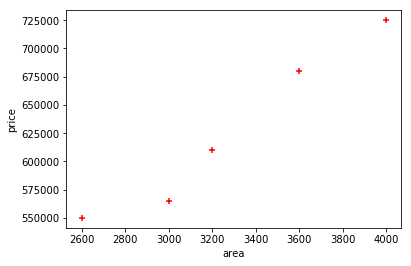

In [18]:
# here the area is the independent variable and price is dependent variable.
#as the price of a house depends on the area.
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [19]:
#the next step is to design the model for single regression.
area = df['area']
area

0    2600
1    3000
2    3200
3    3600
4    4000
Name: area, dtype: int64

In [20]:
area = df[['area']]
area

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [21]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [22]:
# let's Create a linear regression object
reg = linear_model.LinearRegression()
reg.fit(area,price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
#let's predict the price of home whose area is 3300
reg.predict(3300)   

array([ 628715.75342466])

In [24]:
#since we know the equation for regression in single varialble is y=m*x+b
#now for manual testing let's find the co-efficient in regular expresssion which is m in above equation.
reg.coef

AttributeError: 'LinearRegression' object has no attribute 'coef'

In [ ]:
#let's find the intercept in regular expresssion which is b in above equation.
reg.intercept_

In [ ]:
#this is the price(y) of area(x) of 3300 with value of m and b being inserted. 
3300*135.78767123 + 180616.43835616432

### steps
1. Data Preprocessing


In [25]:
import pandas as pd
import numpy as np
import csv
sf = pd.read_csv('/home/dharmendra/Gamma/datasets/Bay area_house_price.csv')
sf.head()

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


In [26]:
#There are several features that we do not need, such as “info”, “z_address”, “zipcode”(We have “neighborhood” as a location variable), “zipid” and “zestimate”(This is the price estimated by Zillow, we don’t want our model to be affected by this).
#so, we will drop them.
sf.drop(sf.columns[[0, 2, 3, 15, 17, 18]], axis=1, inplace=True)
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 13 columns):
address          11330 non-null object
bathrooms        11330 non-null float64
bedrooms         11330 non-null float64
finishedsqft     11330 non-null float64
lastsolddate     11330 non-null object
lastsoldprice    11330 non-null float64
latitude         11330 non-null float64
longitude        11330 non-null float64
neighborhood     11330 non-null object
totalrooms       11330 non-null float64
usecode          11330 non-null object
yearbuilt        11330 non-null float64
zindexvalue      11330 non-null object
dtypes: float64(8), object(5)
memory usage: 1.1+ MB


In [27]:
#The data type of “zindexvalue” should be numeric, so let’s change that.
sf['zindexvalue'] = sf['zindexvalue'].str.replace(',', '')
sf['zindexvalue'] = sf['zindexvalue'].convert_objects(convert_numeric=True)
sf.lastsolddate.min(), sf.lastsolddate.max()

('01/02/2013', '12/31/2015')

* The house sold period in the dateset was between January 2013 and December 2015.

In [28]:
sf.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zindexvalue
count,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04
mean,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147,1.320205e+06
std,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196,5.848170e+05
min,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,6.881000e+05
25%,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000,9.829000e+05
50%,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000,1.211900e+06
75%,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000,1.480400e+06
max,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,5.333500e+06


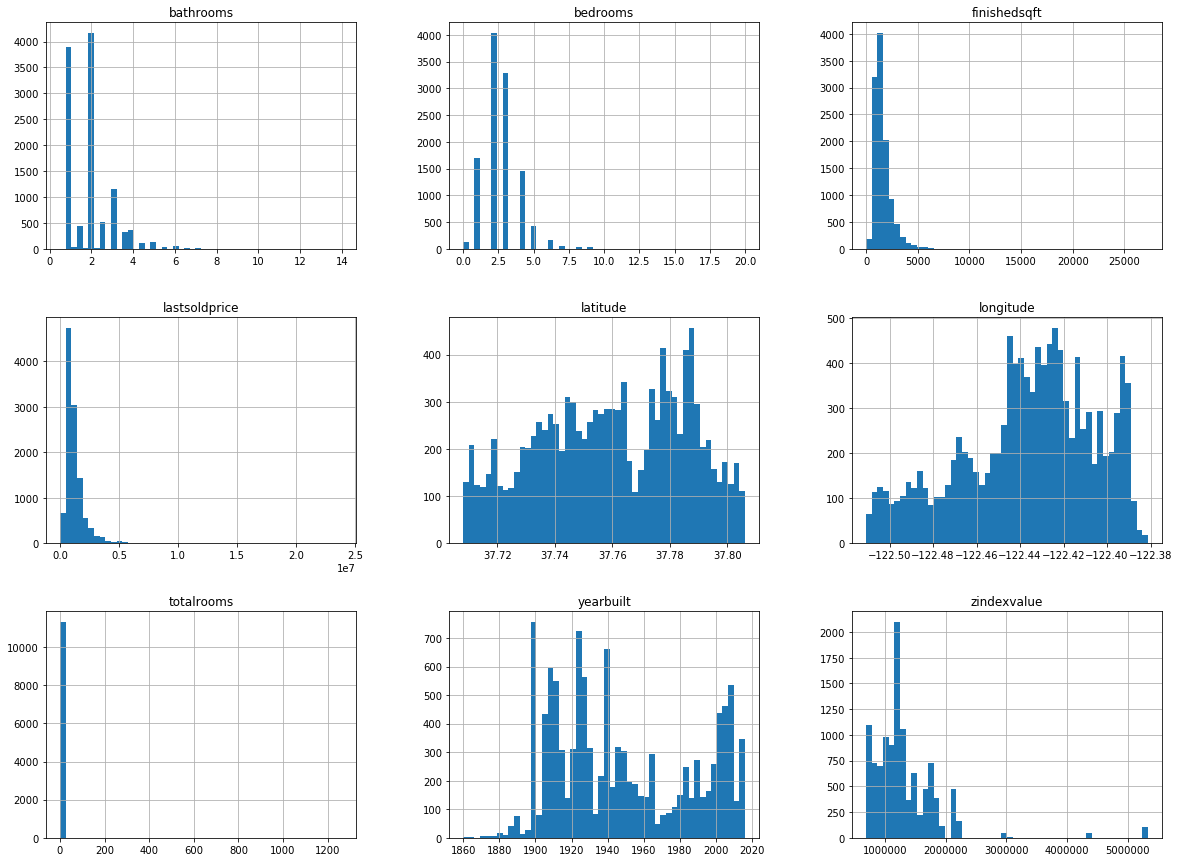

In [29]:
#The count, mean, min and max rows are self-explanatory. 
#The std shows the standard deviation, and the 25%, 50% and 75% rows show the corresponding percentiles.
#To get a feel for the type of data we are dealing with, we plot a histogram for each numeric variable.
%matplotlib inline
import matplotlib.pyplot as plt
sf.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

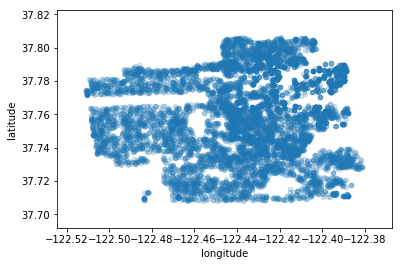

In [30]:
#Let’s create a scatter plot with latitude and longitude to visualize the data:
sf.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)
plt.savefig('map1.png')

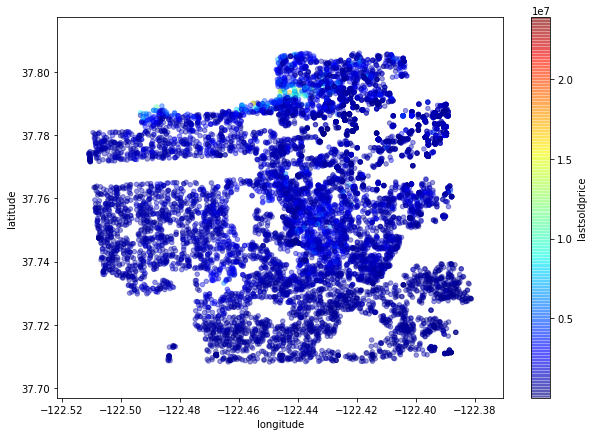

In [31]:
#now let’s color code from the most expensive to the least expensive areas:

sf.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),
    c="lastsoldprice", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

* This image tells us that the most expensive houses sold were in the north area.
* The **variable** we are going to **predict** is the **“last sold price”.** 
* **So let’s look at how much each independent variable correlates with this dependent variable.**

In [32]:
corr_matrix = sf.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice    1.000000
finishedsqft     0.647208
bathrooms        0.536880
zindexvalue      0.460429
bedrooms         0.395478
latitude         0.283107
totalrooms       0.093527
longitude       -0.052595
yearbuilt       -0.189055
Name: lastsoldprice, dtype: float64

* The last sold price tends to increase when the finished sqft and the number of bathrooms go up. You can see a small negative correlation between the year built and the last sold price. 
* And finally, coefficients close to zero indicate that there is no linear correlation.

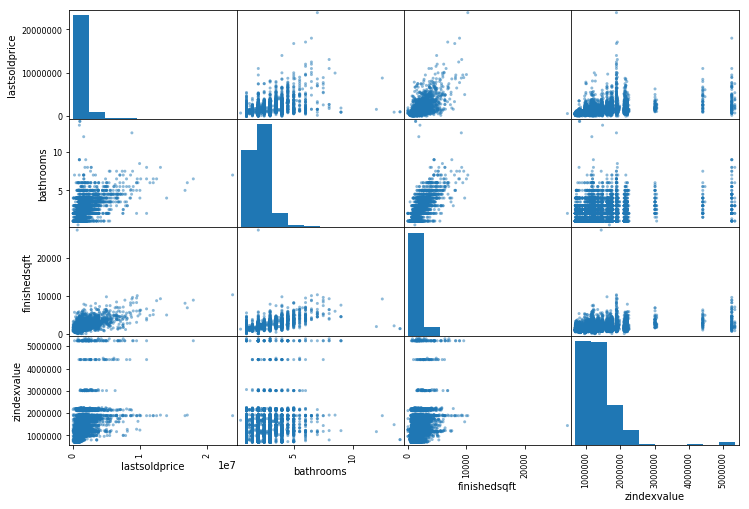

In [34]:
from pandas.tools.plotting import scatter_matrix
attributes = ["lastsoldprice", "bathrooms","finishedsqft" ,"zindexvalue"]
scatter_matrix(sf[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

* To visualize the correlation between variables by using Pandas’ **scatter_matrix** function. We will just focus on a few promising variables, that seem the most correlated with the last sold price as showm above.
* The most promising variable for predicting the last sold price is the finished sqft, so let’s zoom in on their correlation scatter plot.

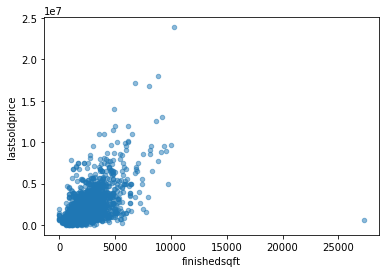

In [35]:
sf.plot(kind="scatter", x="finishedsqft", y="lastsoldprice", alpha=0.5)
plt.savefig('scatter.png')

* The correlation is indeed very strong; you can clearly see the upward trend and that the points are not too dispersed.
* Because each house has different square footage and each neighborhood has different home prices, what we really need is the price per sqft. So, we add a new variable “price_per_sqft”. We then check to see how much this new independent variable correlates with the last sold price.


In [36]:
sf['price_per_sqft'] = sf['lastsoldprice']/sf['finishedsqft']
corr_matrix = sf.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice     1.000000
finishedsqft      0.647208
bathrooms         0.536880
zindexvalue       0.460429
bedrooms          0.395478
latitude          0.283107
totalrooms        0.093527
price_per_sqft    0.005008
longitude        -0.052595
yearbuilt        -0.189055
Name: lastsoldprice, dtype: float64

* Unfortunately, the new price_per_sqft variable shows only a very small positive correlation with the last sold price. But we still need this variable for grouping neighborhoods.
* But we still need this variable for grouping neighborhoods.
* There are 71 neighborhoods in the data, and we are going to group them.

In [37]:
len(sf['neighborhood'].value_counts())

71

In [45]:
#now let's cluster the neighborhood into three groups: 
#1. low price; 2. high price low frequency; 3. high price 4. high frequency.
freq = sf.groupby('neighborhood').count()['address']
mean = sf.groupby('neighborhood').mean()['price_per_sqft']
cluster = pd.concat([freq, mean], axis=1)
cluster['neighborhood'] = cluster.index
cluster.columns = ['freq', 'price_per_sqft','neighborhood']
cluster

,freq,price_per_sqft,neighborhood
neighborhood,,,
Bayview,354,417.049058,Bayview
Bernal Heights,525,3158.199830,Bernal Heights
Buena Vista Park,70,952.912618,Buena Vista Park
Central Richmond,227,659.691461,Central Richmond
Central Sunset,229,610.067525,Central Sunset
Central Waterfront - Dogpatch,58,856.395529,Central Waterfront - Dogpatch
Corona Heights,90,967.902435,Corona Heights
Cow Hollow,175,1226.036408,Cow Hollow
Crocker Amazon,129,506.500691,Crocker Amazon


In [44]:
cluster.describe()

,freq,price_per_sqft
count,71.000000,71.000000
mean,159.577465,1664.908308
std,126.572696,3619.277749
min,3.000000,374.201197
25%,67.500000,613.337664
50%,123.000000,756.246284
75%,210.500000,985.156646
max,540.000000,26914.471572


In [46]:
#low price neighborhoods:
cluster1 = cluster[cluster.price_per_sqft < 756]
cluster1.index

Index(['Bayview', 'Central Richmond', 'Central Sunset', 'Crocker Amazon',
       'Daly City', 'Diamond Heights', 'Excelsior', 'Forest Hill',
       'Forest Hill Extension', 'Golden Gate Heights', 'Ingleside',
       'Ingleside Heights', 'Ingleside Terrace', 'Inner Parkside',
       'Inner Richmond', 'Inner Sunset', 'Lakeshore', 'Little Hollywood',
       'Merced Heights', 'Mission Terrace', 'Mount Davidson Manor',
       'Oceanview', 'Outer Mission', 'Outer Parkside', 'Outer Richmond',
       'Outer Sunset', 'Parkside', 'Portola', 'Silver Terrace', 'Sunnyside',
       'Visitacion Valley', 'West Portal', 'Western Addition',
       'Westwood Highlands', 'Westwood Park'],
      dtype='object', name='neighborhood')

In [47]:
#high price and low frequency neighborhoods.

cluster_temp = cluster[cluster.price_per_sqft >= 756]
cluster2 = cluster_temp[cluster_temp.freq <123]
cluster2.index

Index(['Buena Vista Park', 'Central Waterfront - Dogpatch', 'Corona Heights',
       'Haight-Ashbury', 'Lakeside', 'Lone Mountain', 'Midtown Terrace',
       'North Beach', 'North Waterfront', 'Parnassus - Ashbury',
       'Presidio Heights', 'Sea Cliff', 'St. Francis Wood', 'Telegraph Hill',
       'Twin Peaks'],
      dtype='object', name='neighborhood')

In [48]:
#high price and high frequency neighborhoods.

cluster3 = cluster_temp[cluster_temp.freq >=123]
cluster3.index

Index(['Bernal Heights', 'Cow Hollow', 'Downtown',
       'Eureka Valley - Dolores Heights - Castro', 'Glen Park', 'Hayes Valley',
       'Lake', 'Lower Pacific Heights', 'Marina', 'Miraloma Park', 'Mission',
       'Nob Hill', 'Noe Valley', 'North Panhandle', 'Pacific Heights',
       'Potrero Hill', 'Russian Hill', 'South Beach', 'South of Market',
       'Van Ness - Civic Center', 'Yerba Buena'],
      dtype='object', name='neighborhood')